---
title: "Height"
description: "Analyzing height with PyMC"
author: "Mads Chr. Hansen"
date: "2023-10-08"
categories: [PyMC]
image: "https://images.unsplash.com/photo-1531210488748-d1620f6506a5?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2940&q=80"
format:
  html:
    code-fold: true
    code-tools: true
toc: true
#citation: true
bibliography: ../../references.bib
---

# Analysis of Height

We will analyze height data [@Lindley1983]

::: {#thm-line}

### Line

The equation of any straight line, called a linear equation, can be written as:

$$
y = mx + b
$$
:::

See @thm-line.

::: {.proof}
Here is a proof
:::

In [7]:
import pandas as pd
import arviz as az
import graphviz as gr
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import xarray as xr
from scipy import stats
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

az.style.use(["arviz-darkgrid", "arviz-viridish"])
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%reload_ext watermark
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
data.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0

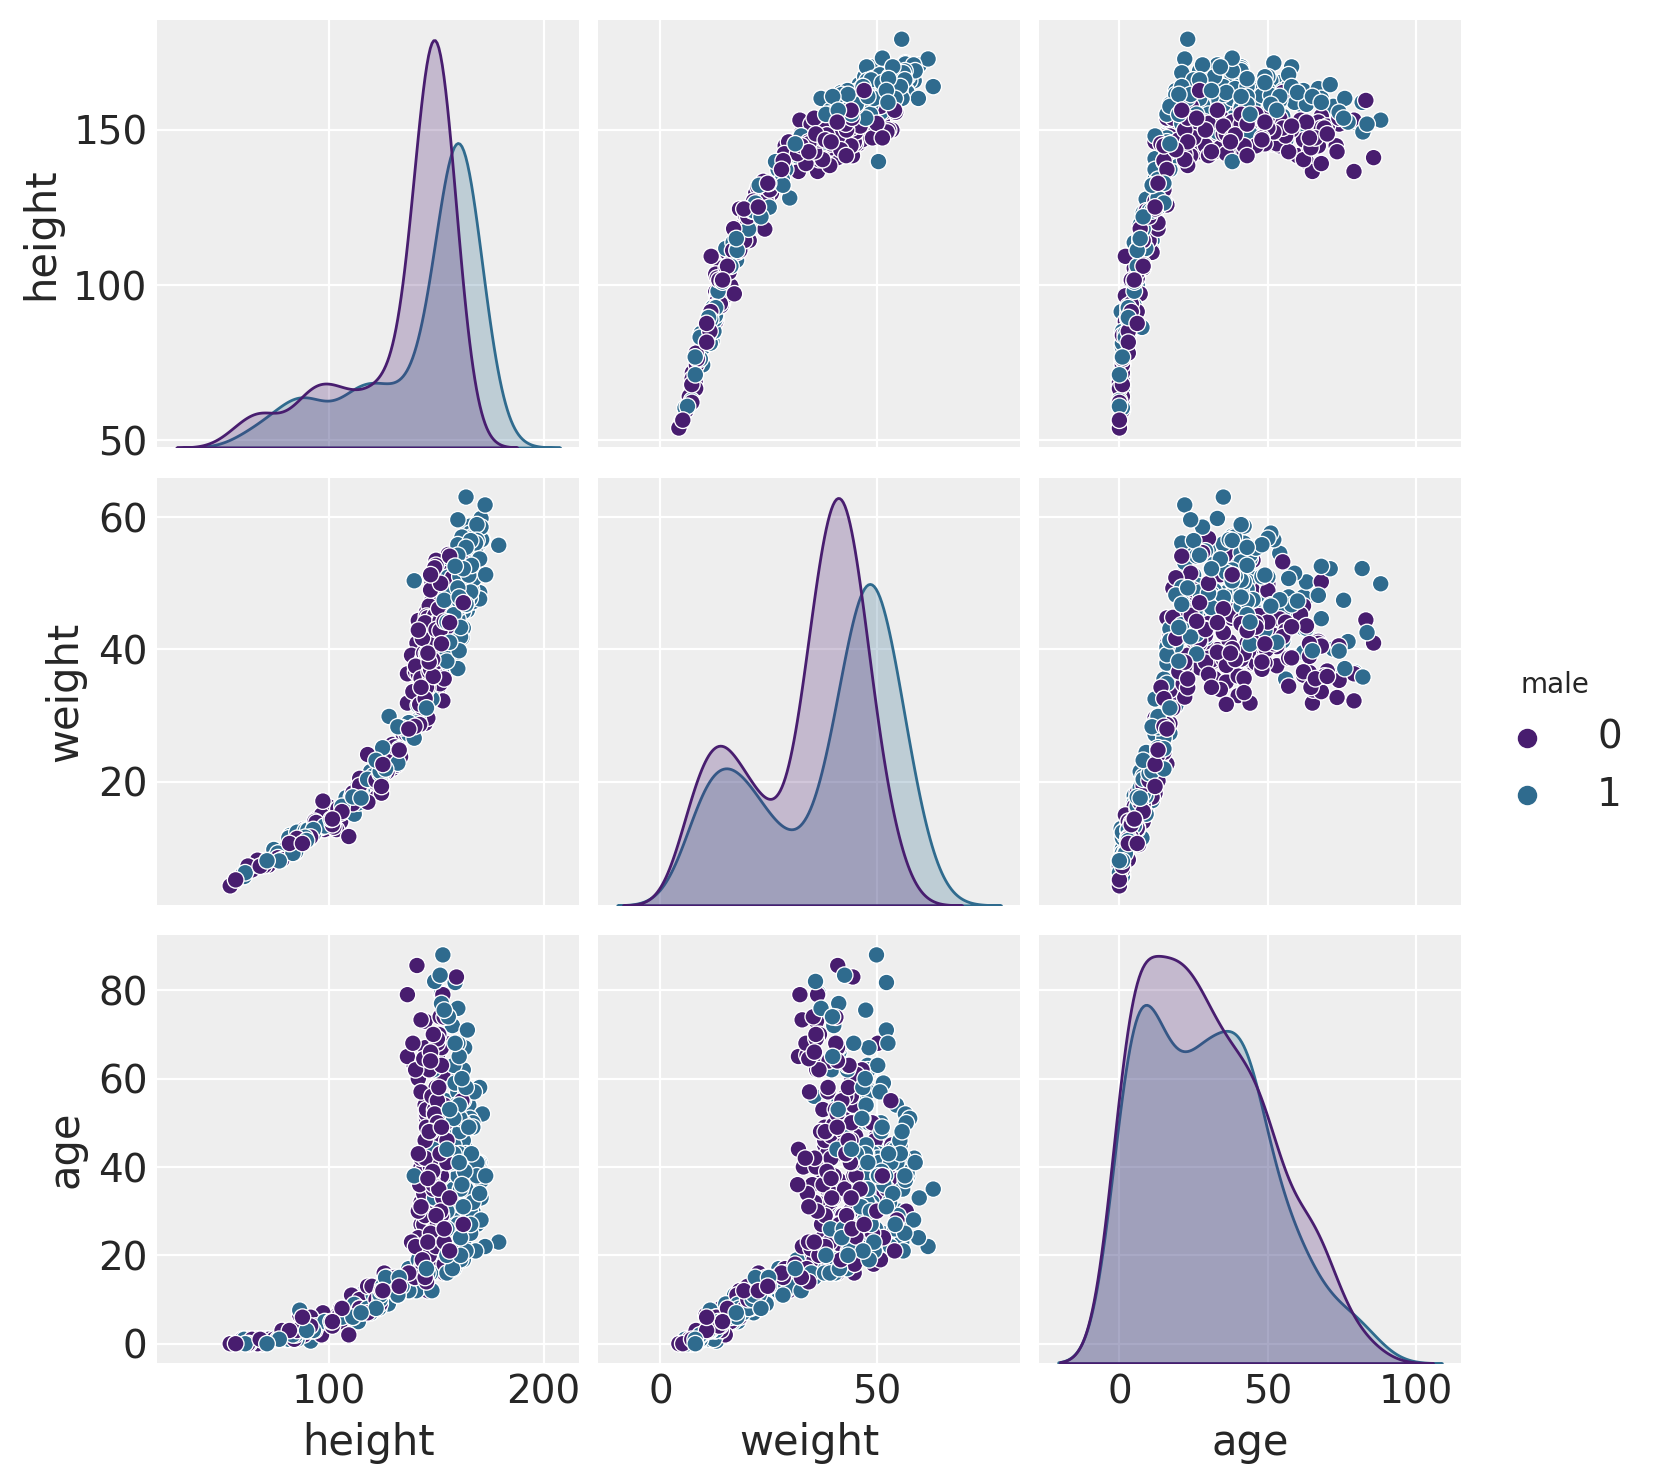

In [9]:
sns.pairplot(data, hue='male')

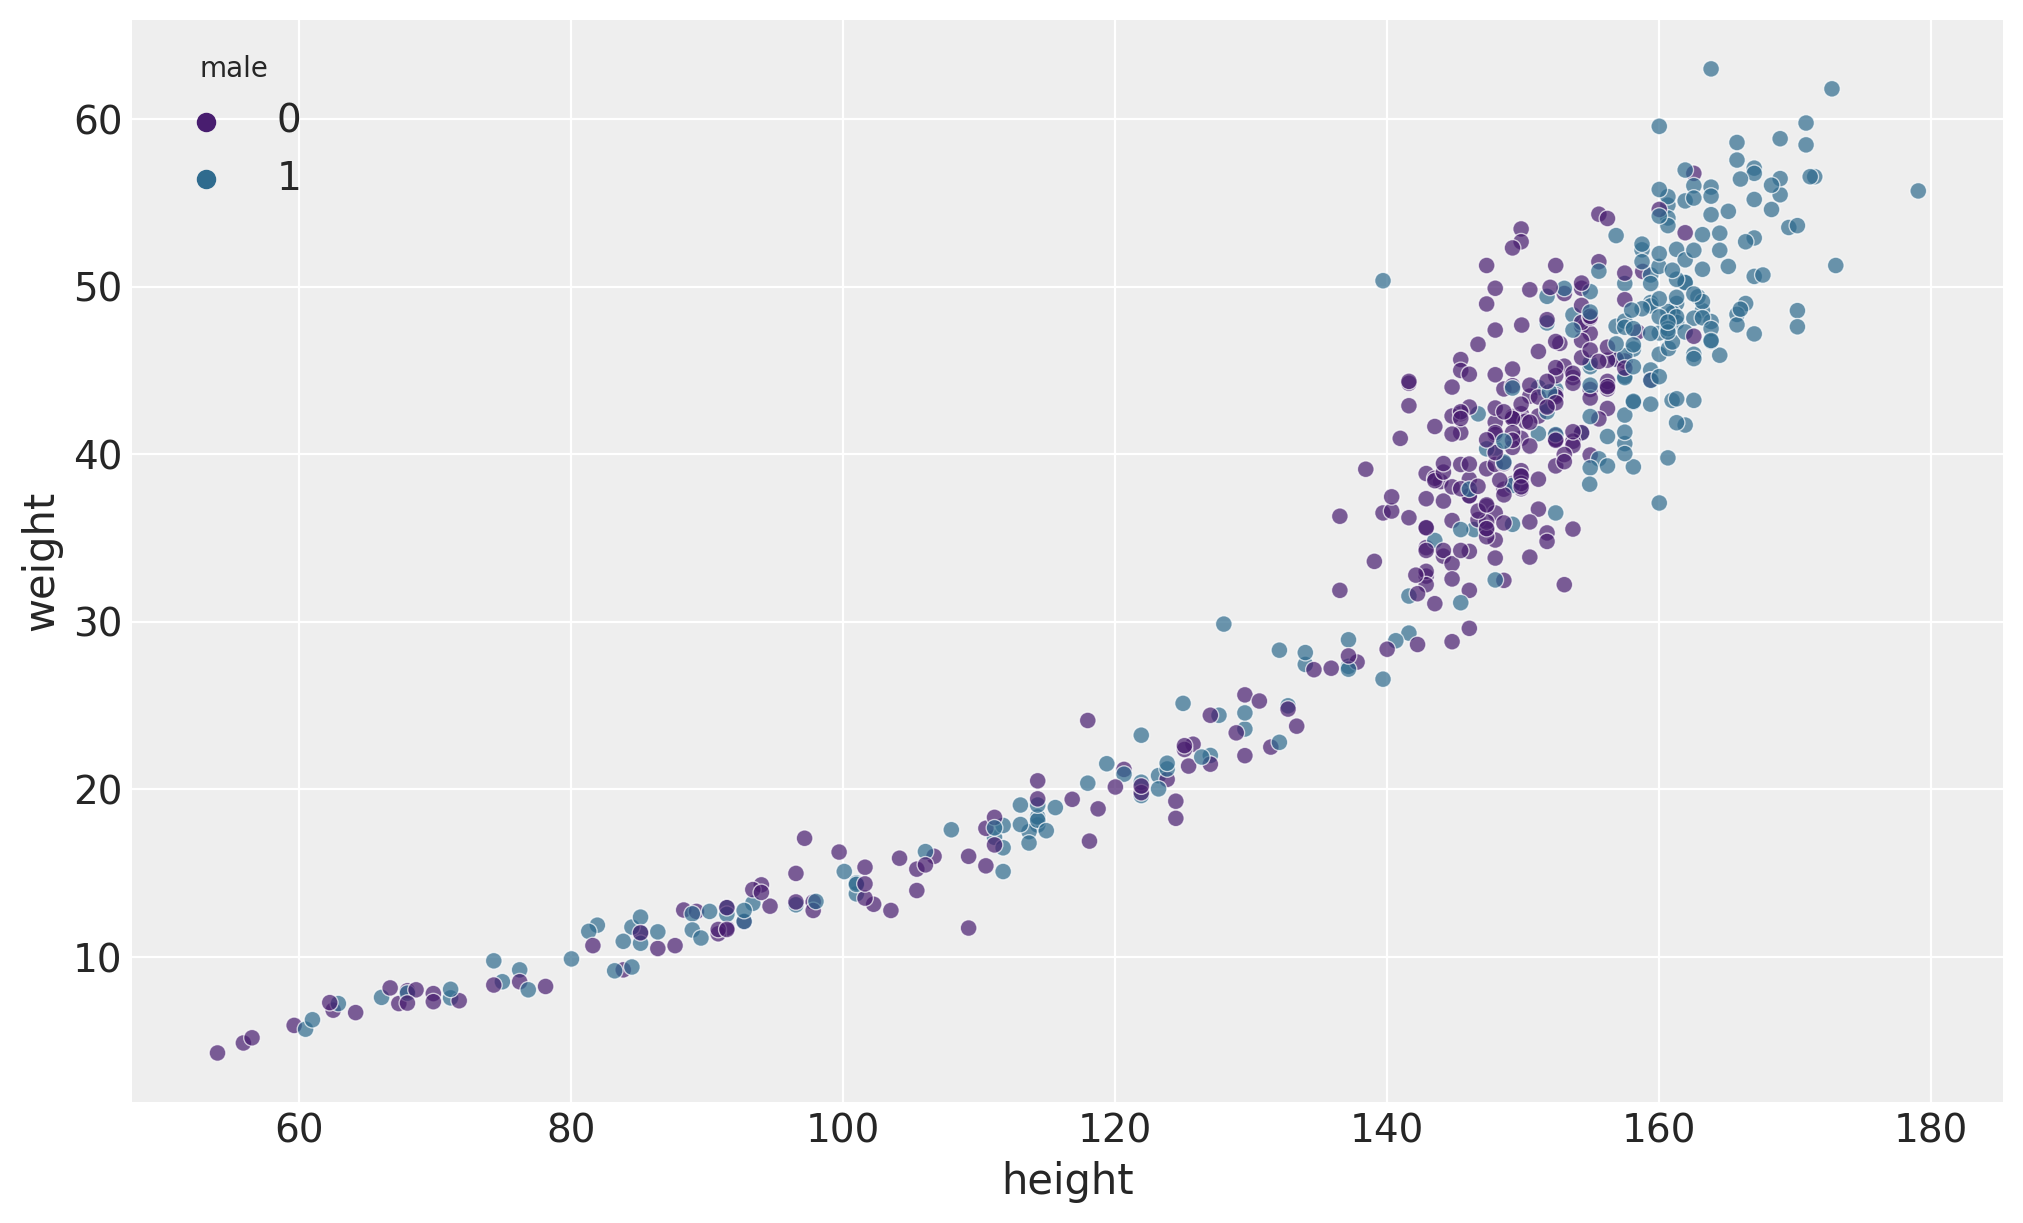

In [8]:
sns.scatterplot(data, x='height', y='weight', alpha=0.7, hue='male');

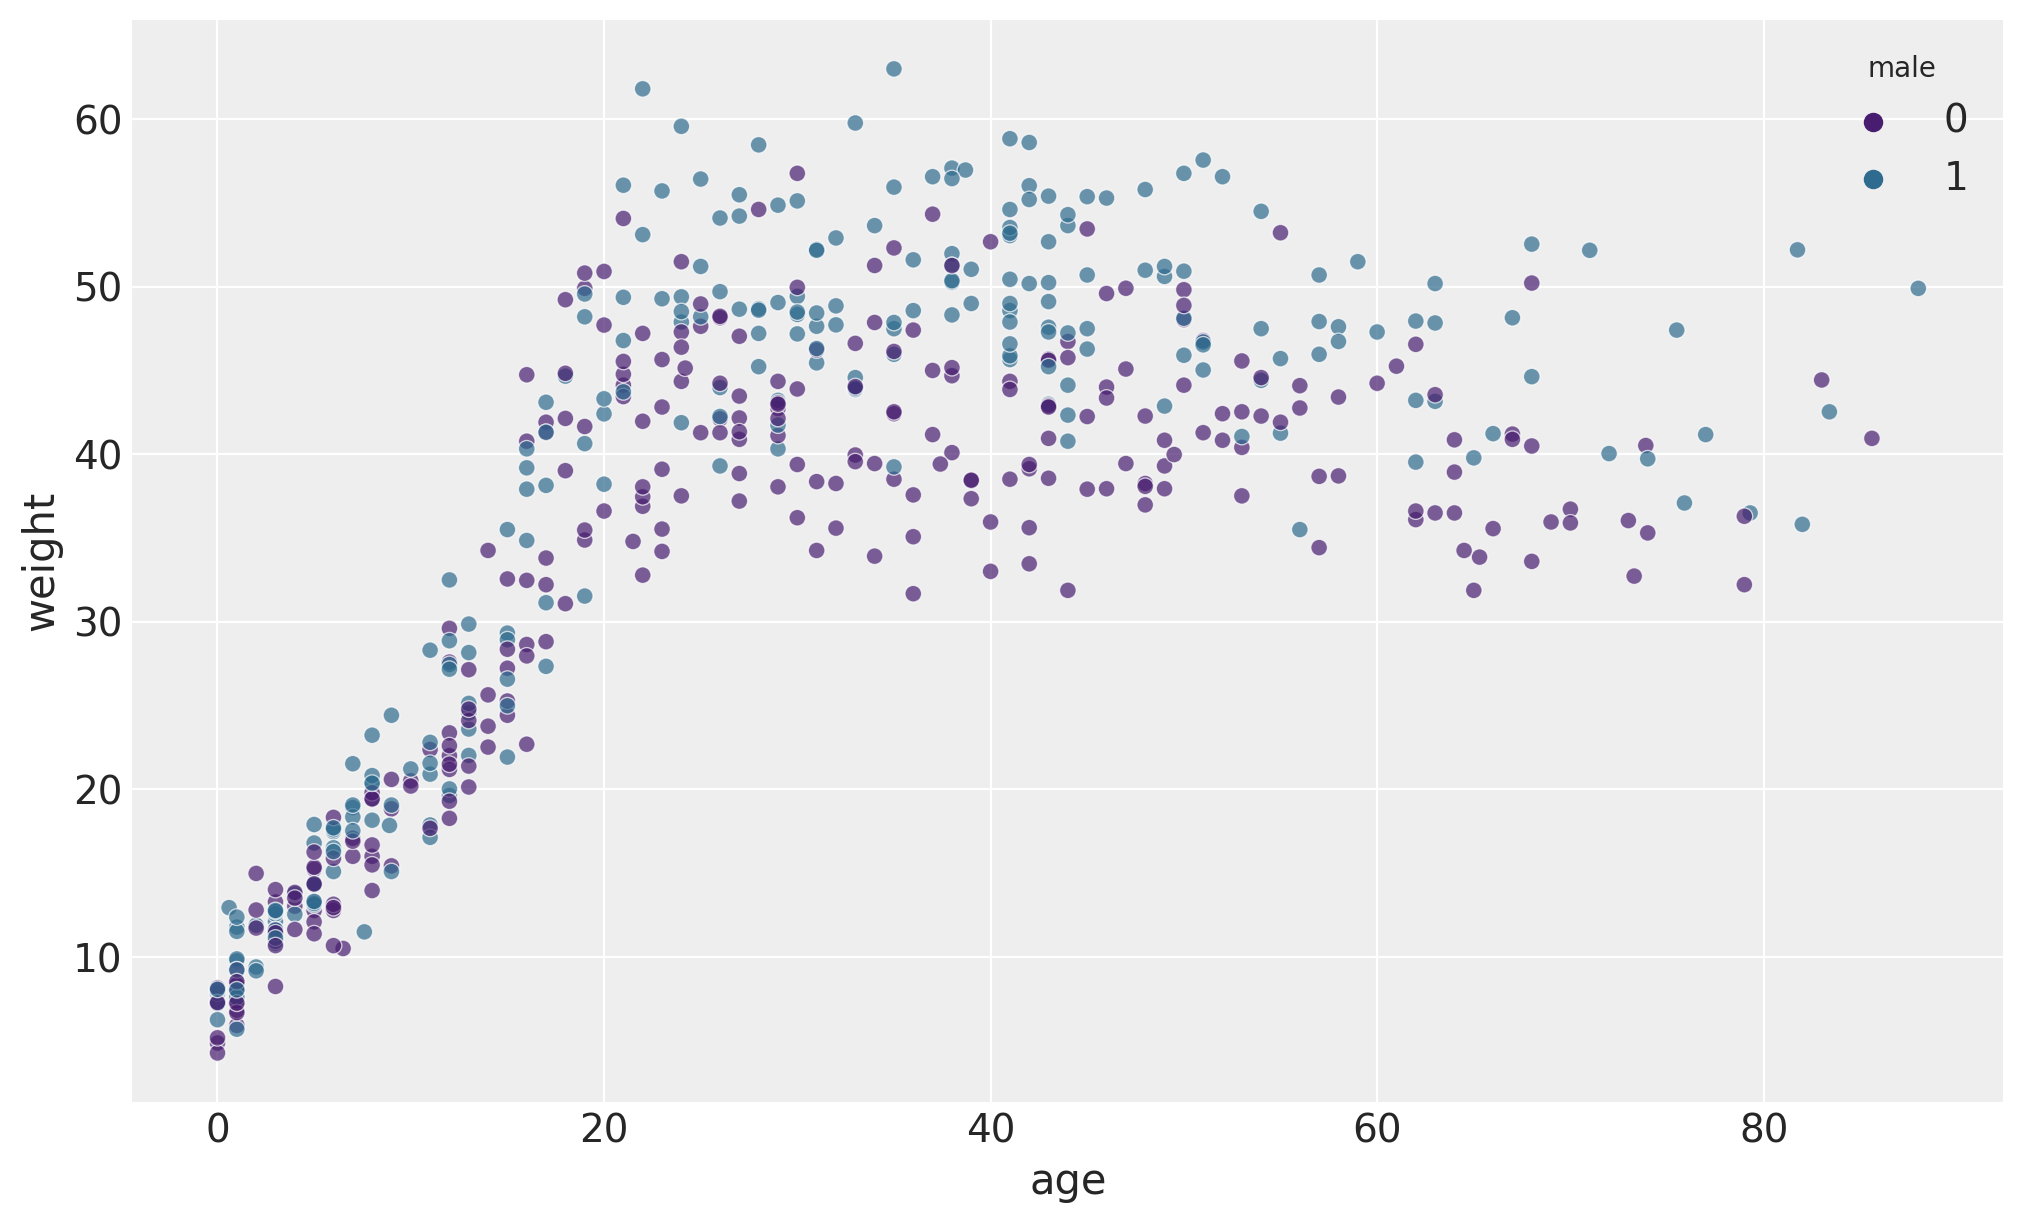

In [9]:
sns.scatterplot(data, x='age', y='weight', alpha=0.7, hue='male');

It seems that there is a linear relationship from age 0 to 18 and then it levels out. Males at a higher level.

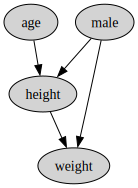

In [10]:
g = gr.Digraph()
g.node(name="height", label="height", style="filled")
g.node(name="weight", label="weight", style="filled")
g.node(name="male", label="male", style="filled")
g.node(name="age", label="age", style="filled")
g.edge(tail_name="height", head_name="weight")
g.edge(tail_name="age", head_name="height")
g.edge(tail_name="male", head_name="height")
g.edge(tail_name="male", head_name="weight")
g

# Basic Model
No regressors

Text(0.5, 1.0, 'Histogram of Weight')

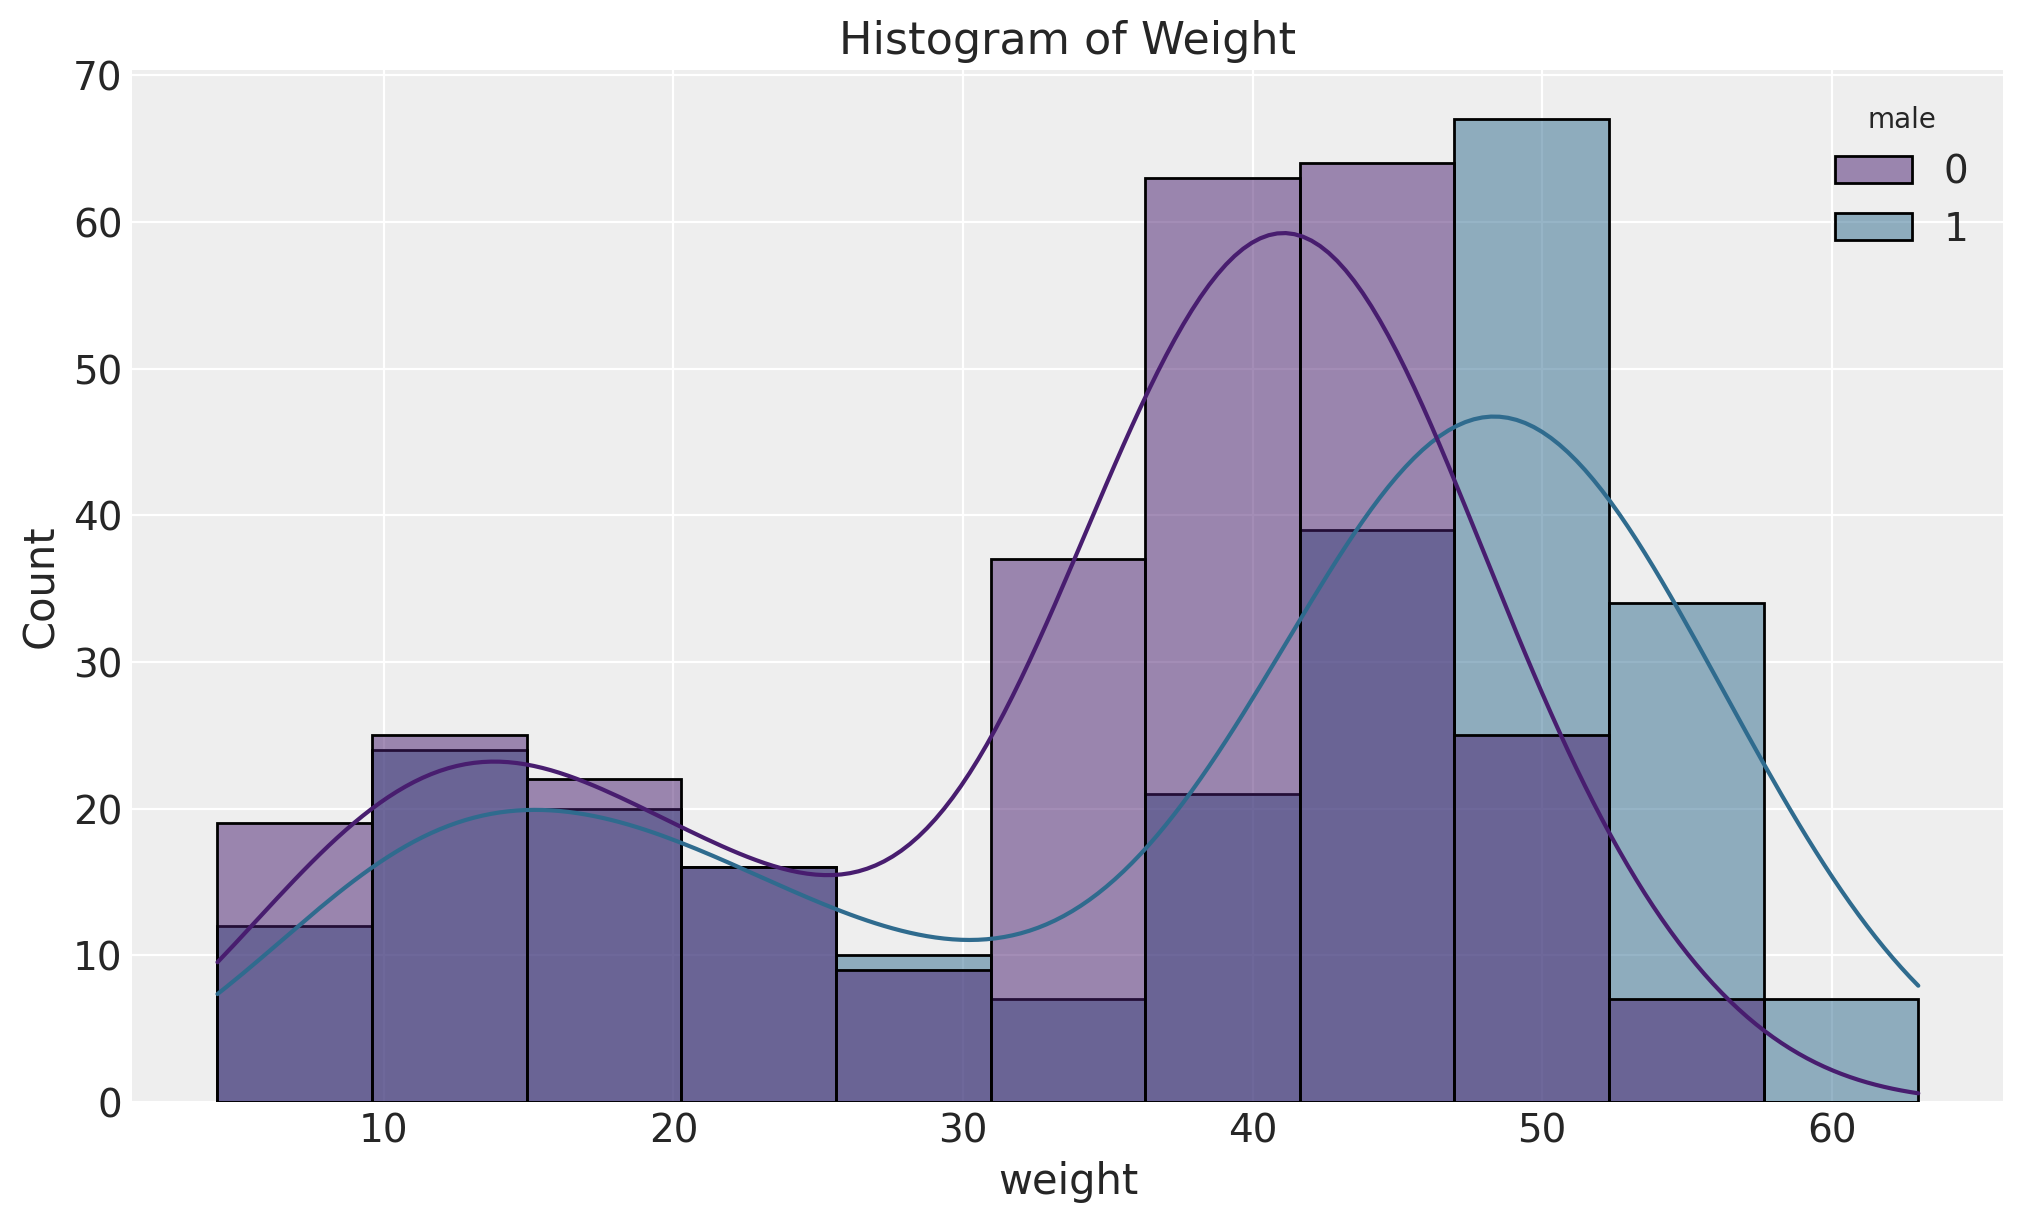

In [11]:
sns.histplot(data, x='weight', kde=True, hue='male');
plt.title('Histogram of Weight')

In [12]:
with pm.Model() as basic_model:
    sigma = pm.Exponential("sigma", 10)
    mu = pm.Normal('mu', mu=30, sigma=1)
    obs = pm.Normal("mass", mu=mu, sigma=sigma, observed=data.weight)
    
    prior = pm.sample_prior_predictive()
    idata_basic = pm.sample()
    pm.compute_log_likelihood(idata_basic, extend_inferencedata=True)
    pm.sample_posterior_predictive(idata_basic, extend_inferencedata=True)

Sampling: [mass, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Sampling: [mass]


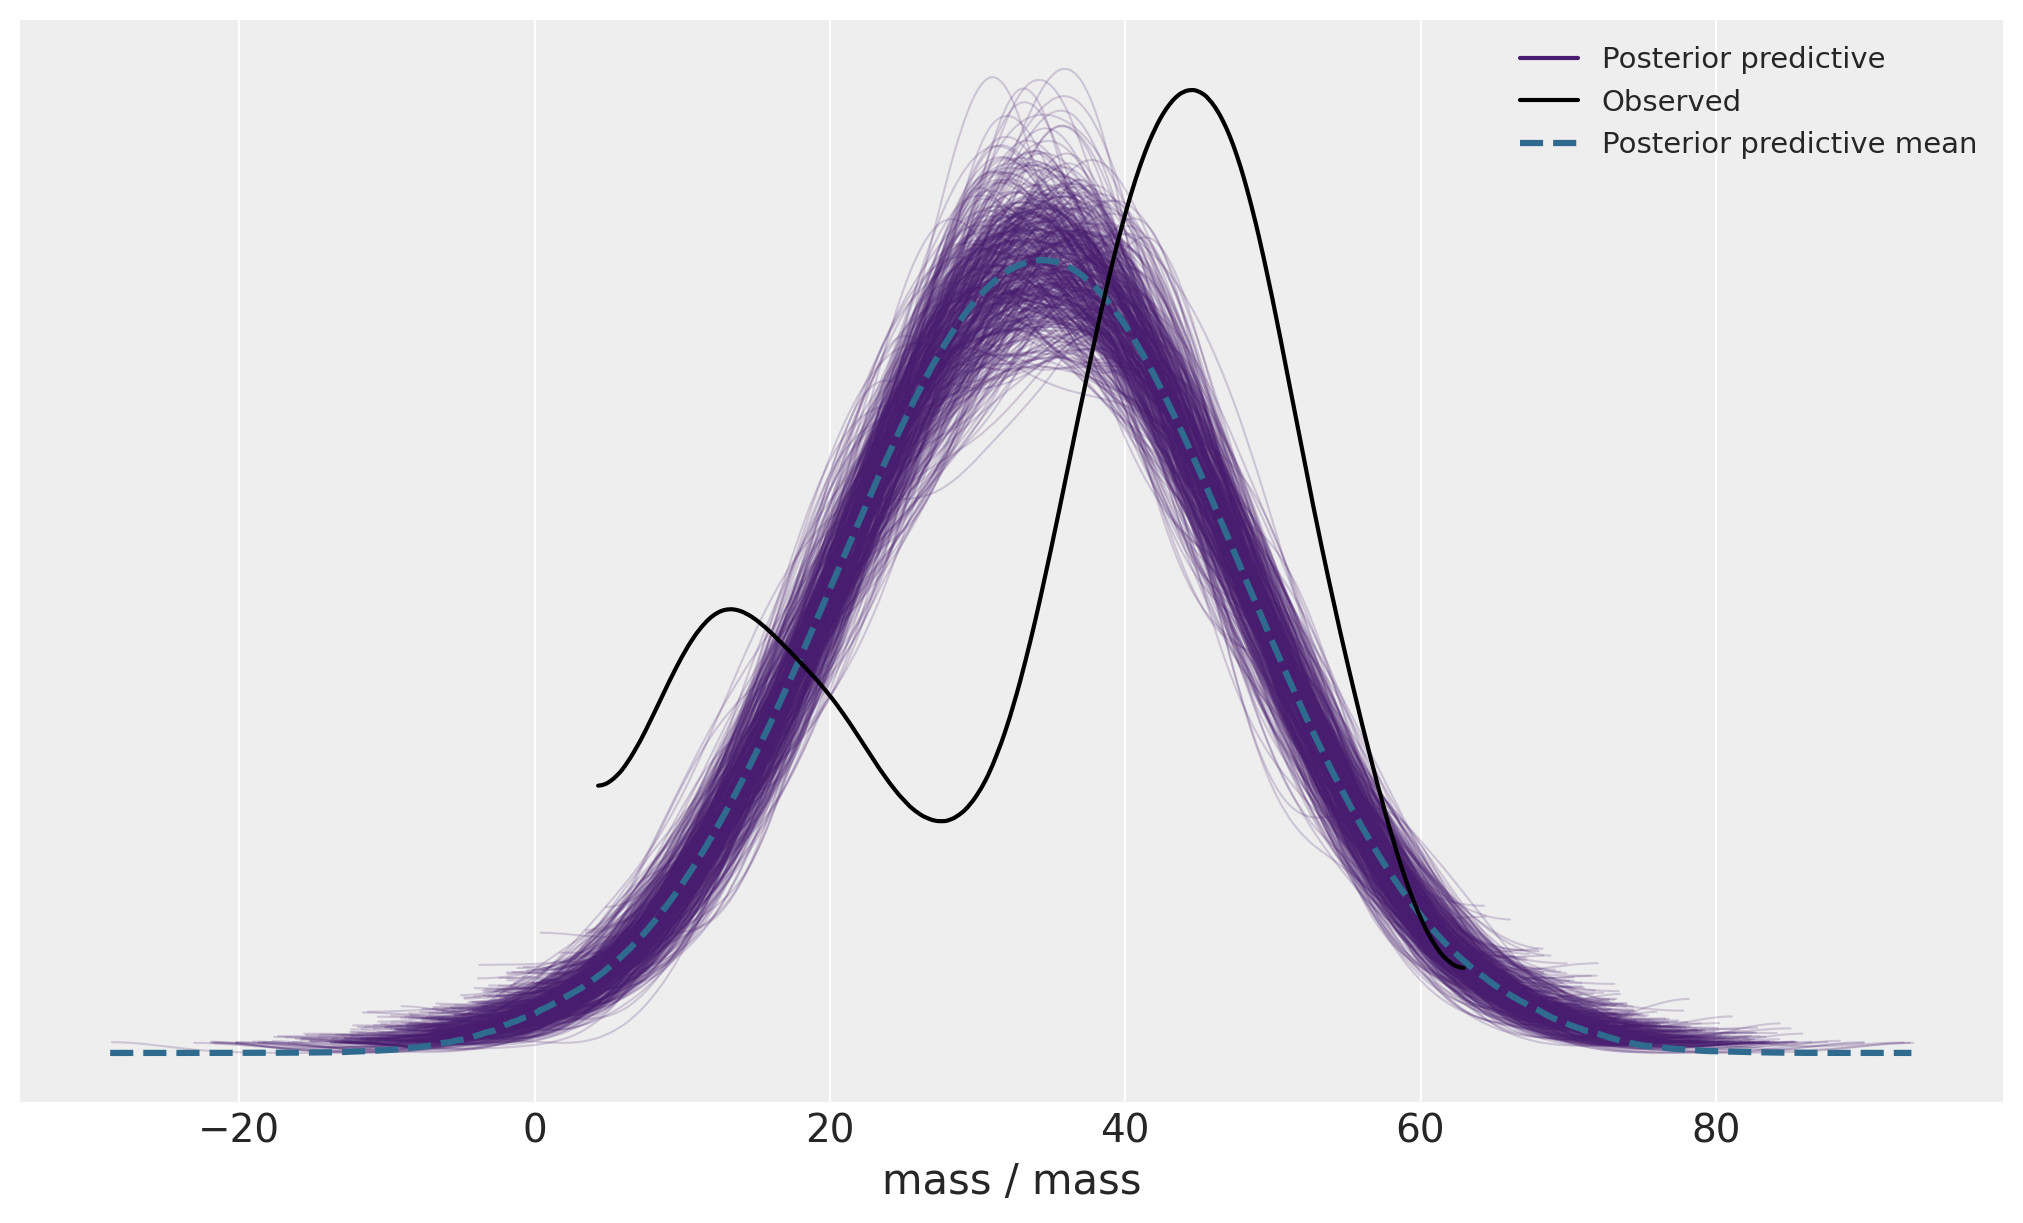

In [13]:
az.plot_ppc(data=idata_basic, group="posterior", kind="kde", num_pp_samples=500);


In [14]:
male_idx, male = data["male"].astype('category').factorize(sort=True)

In [15]:
coords = {
    "male": male,
    "obs": range(len(data))
}

In [16]:
with pm.Model(coords=coords) as male_model:
    sigma = pm.Exponential("sigma", 10)
    mu = pm.Normal('mu', mu=30, sigma=1, dims="male")
    obs = pm.Normal("mass", mu=mu[male_idx], sigma=sigma, observed=data.weight)
    
    prior = pm.sample_prior_predictive()
    idata_male = pm.sample()
    pm.compute_log_likelihood(idata_male, extend_inferencedata=True)
    pm.sample_posterior_predictive(idata_male, extend_inferencedata=True)

Sampling: [mass, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Sampling: [mass]


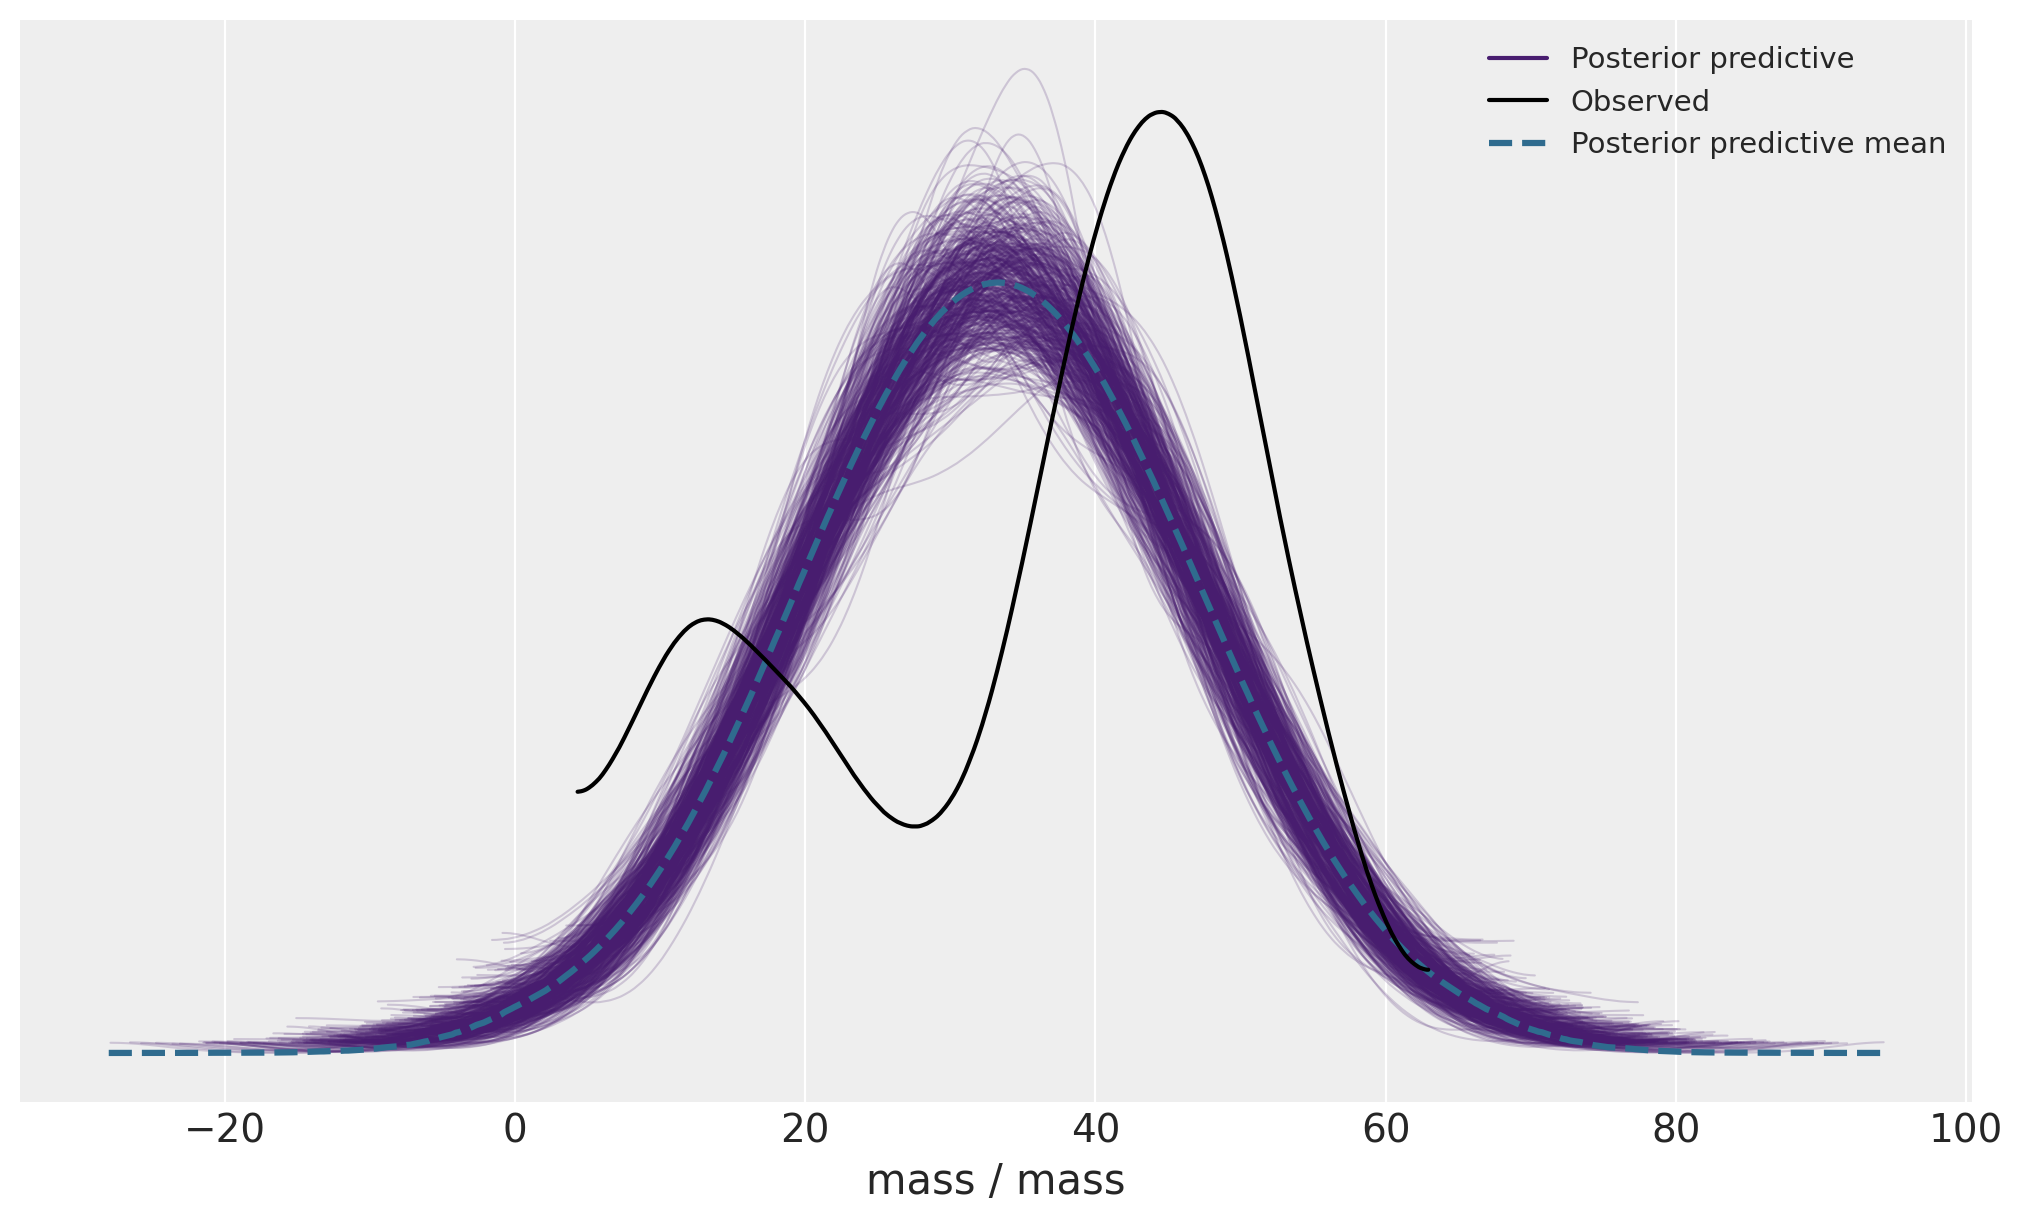

In [17]:
az.plot_ppc(data=idata_male, group="posterior", kind="kde", num_pp_samples=500);

In [18]:
with pm.Model(coords=coords) as age_model:
    sigma = pm.Exponential("sigma", 10)
    mu = pm.Normal('mu', mu=1, sigma=2)
    obs = pm.Normal("mass", mu=mu*data.age, sigma=sigma, observed=data.weight)
    
    prior = pm.sample_prior_predictive()
    idata_age = pm.sample()
    pm.compute_log_likelihood(idata_age, extend_inferencedata=True)
    pm.sample_posterior_predictive(idata_age, extend_inferencedata=True)

Sampling: [mass, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Sampling: [mass]


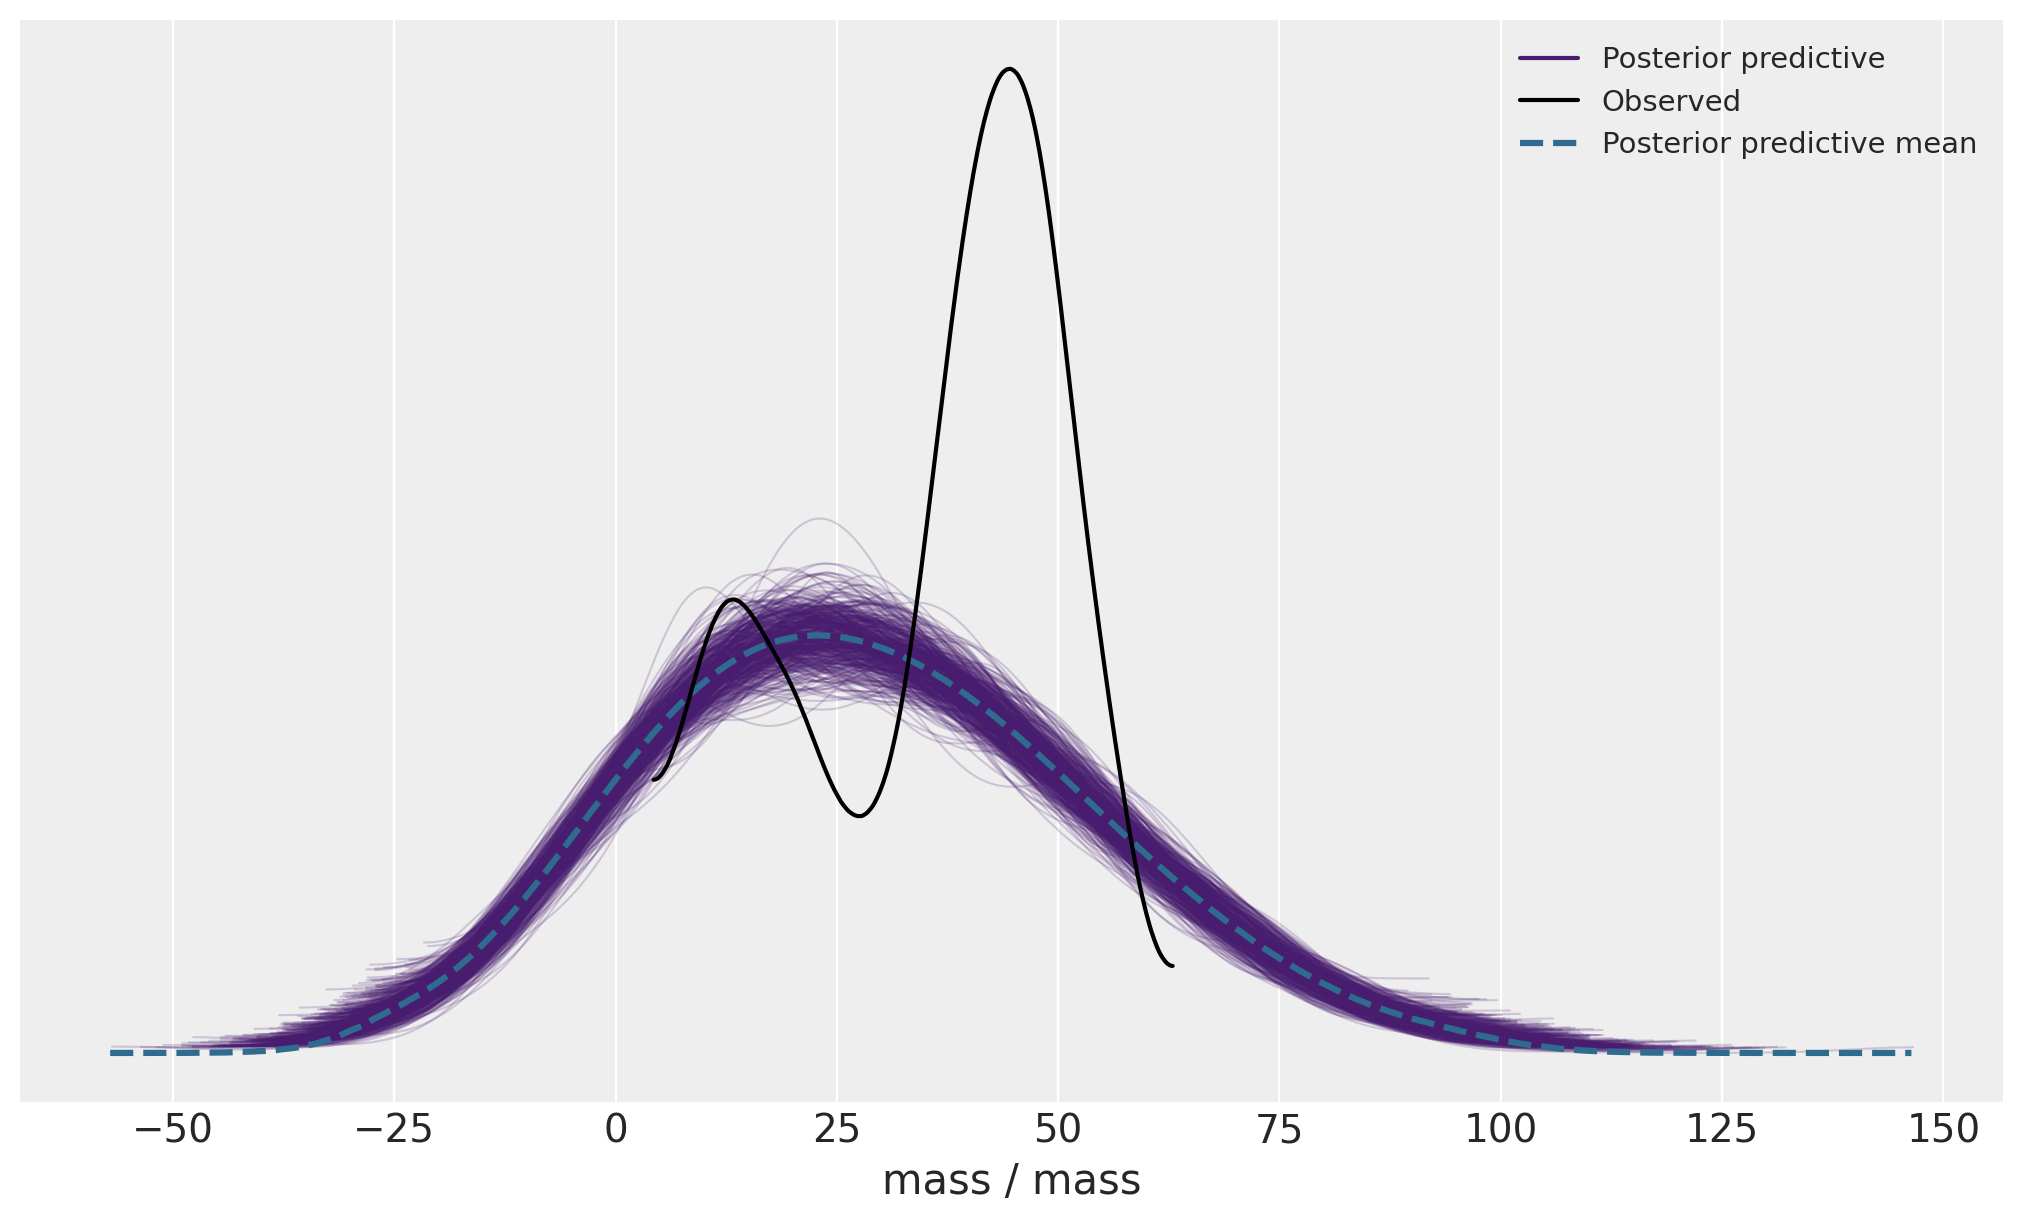

In [19]:
az.plot_ppc(data=idata_age, group="posterior", kind="kde", num_pp_samples=500);

In [20]:
with pm.Model(coords=coords) as height_model:
    sigma = pm.Exponential("sigma", 10)
    mu = pm.Normal('mu', mu=1, sigma=2)
    obs = pm.Normal("mass", mu=mu*data.height, sigma=sigma, observed=data.weight)
    
    prior = pm.sample_prior_predictive()
    idata_height = pm.sample()
    pm.compute_log_likelihood(idata_height, extend_inferencedata=True)
    pm.sample_posterior_predictive(idata_height, extend_inferencedata=True)

Sampling: [mass, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Sampling: [mass]


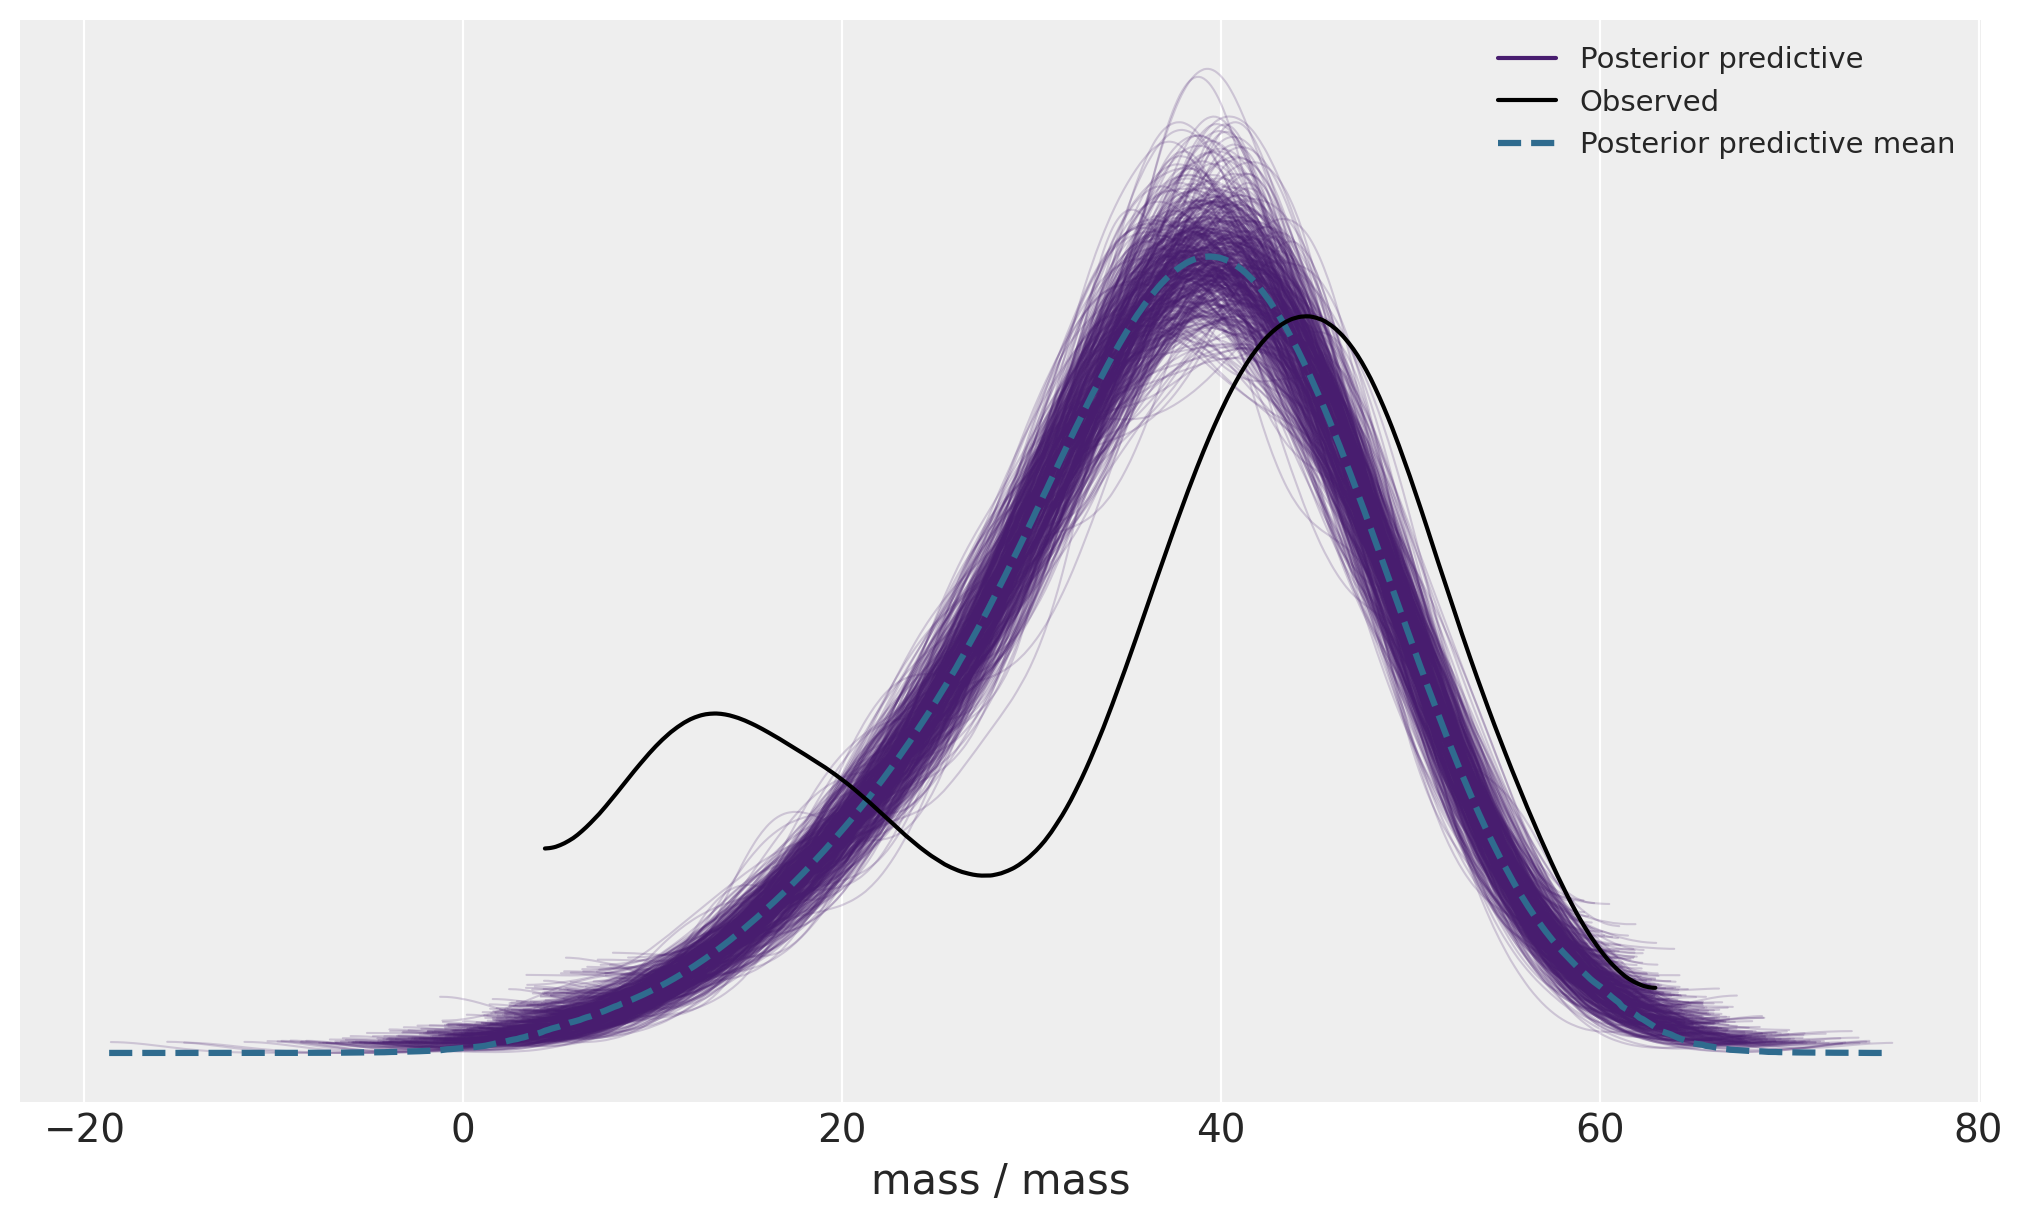

In [21]:
az.plot_ppc(data=idata_height, group="posterior", kind="kde", num_pp_samples=500);

In [22]:
with pm.Model(coords=coords) as height_exp_model:
    sigma = pm.Exponential("sigma", 10)
    mu = pm.Normal('mu', mu=1, sigma=2)
    e = pm.Normal('e', mu=1, sigma=2)
    obs = pm.Normal("mass", mu=mu*data.height.values ** e, sigma=sigma, observed=data.weight)
    
    prior = pm.sample_prior_predictive()
    idata_height_exp = pm.sample()
    pm.compute_log_likelihood(idata_height_exp, extend_inferencedata=True)
    pm.sample_posterior_predictive(idata_height_exp, extend_inferencedata=True)

Sampling: [e, mass, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu, e]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


Sampling: [mass]


In [23]:
az.summary(idata_height_exp)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     0.000  0.000   0.000    0.000      0.000    0.000    1048.0    1159.0   
e      2.613  0.045   2.531    2.699      0.001    0.001    1048.0    1156.0   
sigma  3.864  0.108   3.670    4.072      0.003    0.002    1785.0    1734.0   

       r_hat  
mu       1.0  
e        1.0  
sigma    1.0

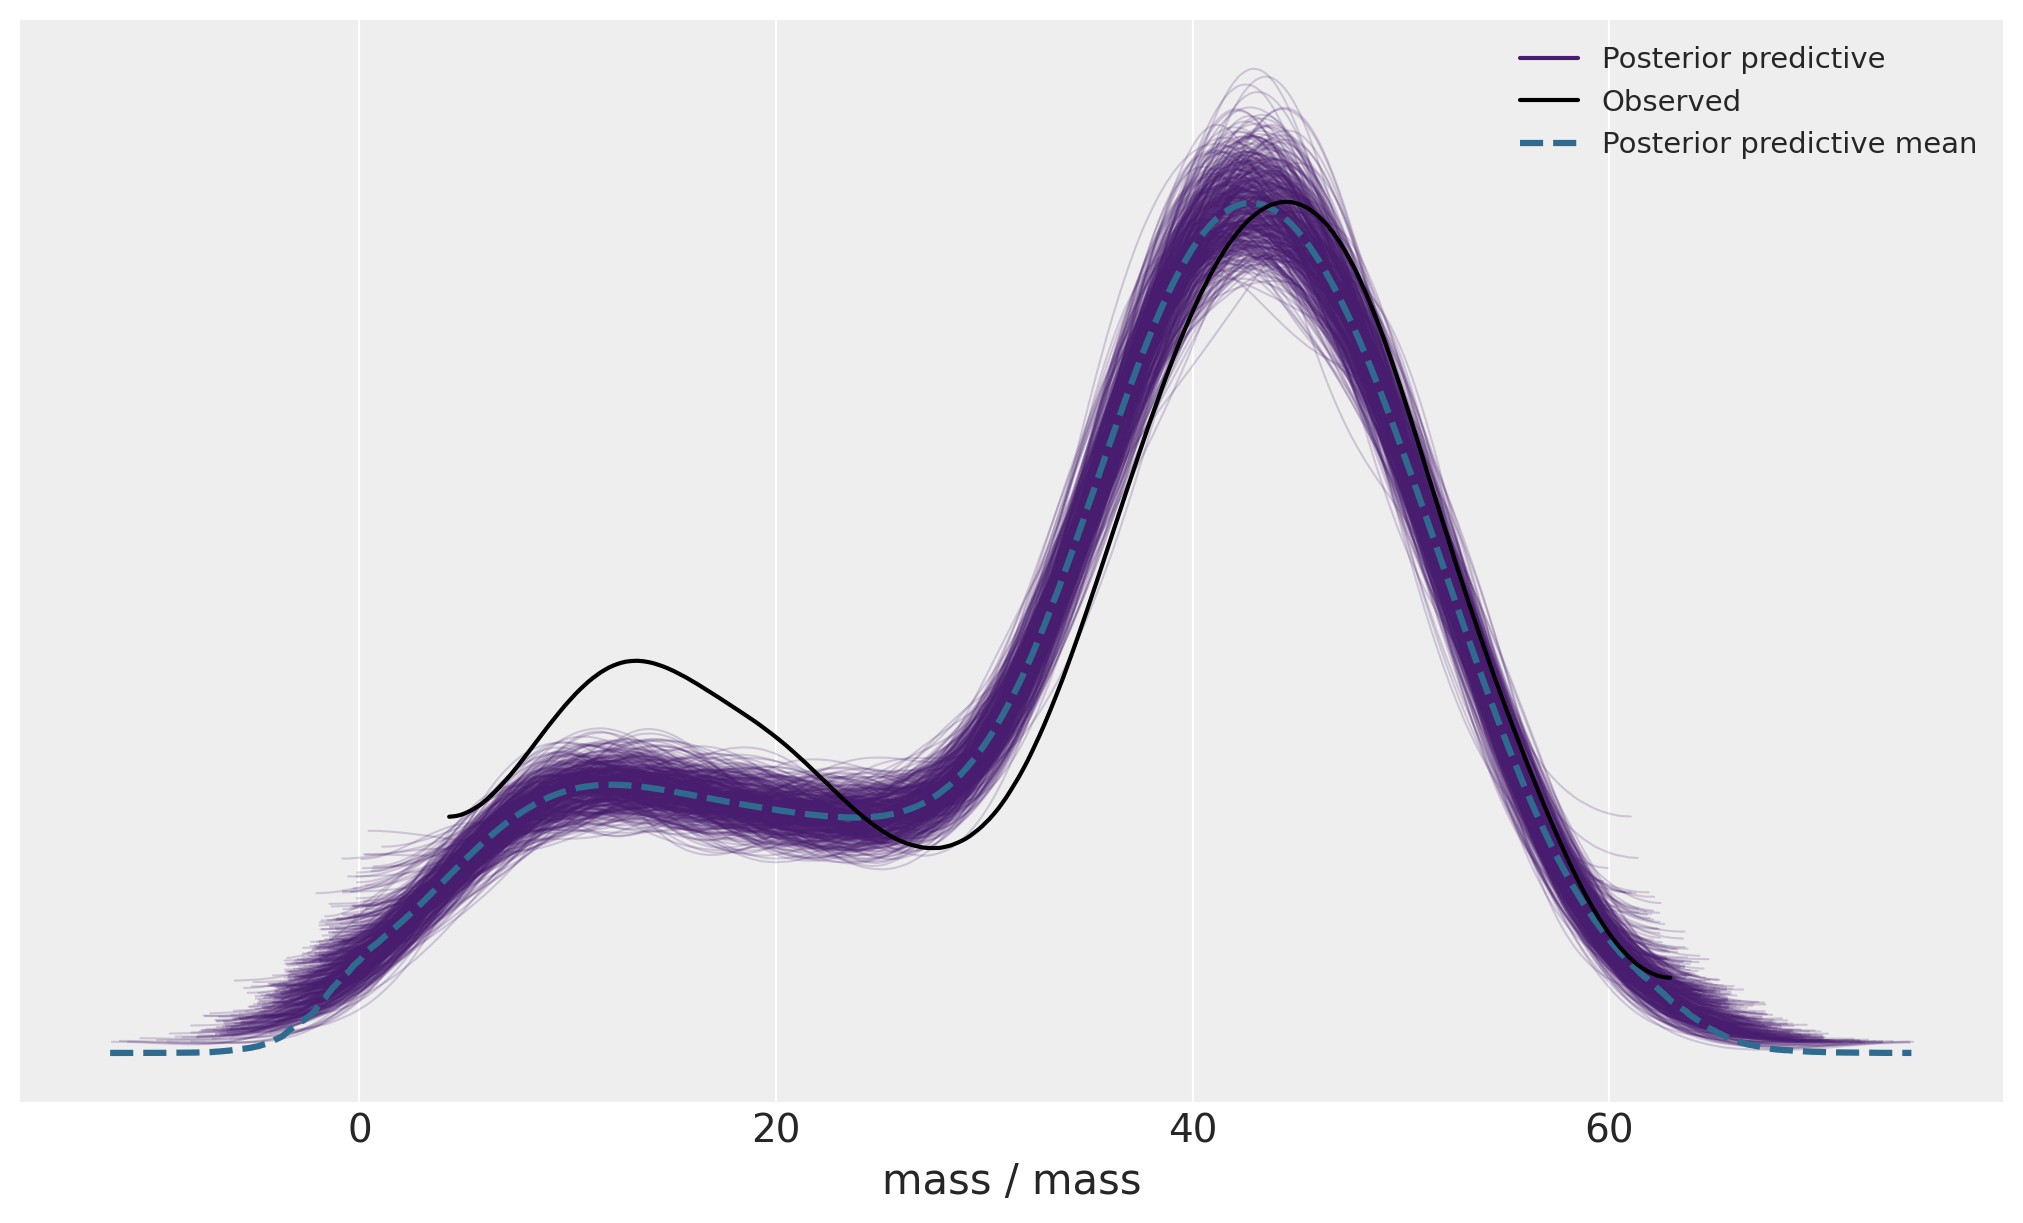

In [24]:
az.plot_ppc(data=idata_height_exp, group="posterior", kind="kde", num_pp_samples=500);

In [26]:
with pm.Model(coords=coords) as height_exp_age_model:
    height = pm.ConstantData('height', data.height.values)
    sigma = pm.Exponential("sigma", 10)
    mu = pm.Normal('mu', mu=1, sigma=2, dims='male')
    e = pm.Normal('e', mu=1, sigma=2, dims='male')
    obs = pm.TruncatedNormal("mass", mu=mu[male_idx]*height ** e[male_idx], sigma=sigma, lower=0, observed=data.weight, dims='obs')
    
    prior = pm.sample_prior_predictive()
    idata_height_exp_male = pm.sample()
    pm.compute_log_likelihood(idata_height_exp_male, extend_inferencedata=True)
    pm.sample_posterior_predictive(idata_height_exp_male, extend_inferencedata=True)

Sampling: [e, mass, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu, e]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 145 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


Sampling: [mass]


In [27]:
az.summary(idata_height_exp_male)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu[0]  0.000  0.000   0.000    0.000      0.000    0.000    1441.0    1453.0   
mu[1]  0.000  0.000   0.000    0.000      0.000    0.000    1352.0    1300.0   
e[0]   2.768  0.081   2.619    2.922      0.002    0.002    1442.0    1426.0   
e[1]   2.623  0.069   2.488    2.749      0.002    0.001    1351.0    1304.0   
sigma  3.867  0.110   3.675    4.086      0.003    0.002    1899.0    1095.0   

       r_hat  
mu[0]    1.0  
mu[1]    1.0  
e[0]     1.0  
e[1]     1.0  
sigma    1.0

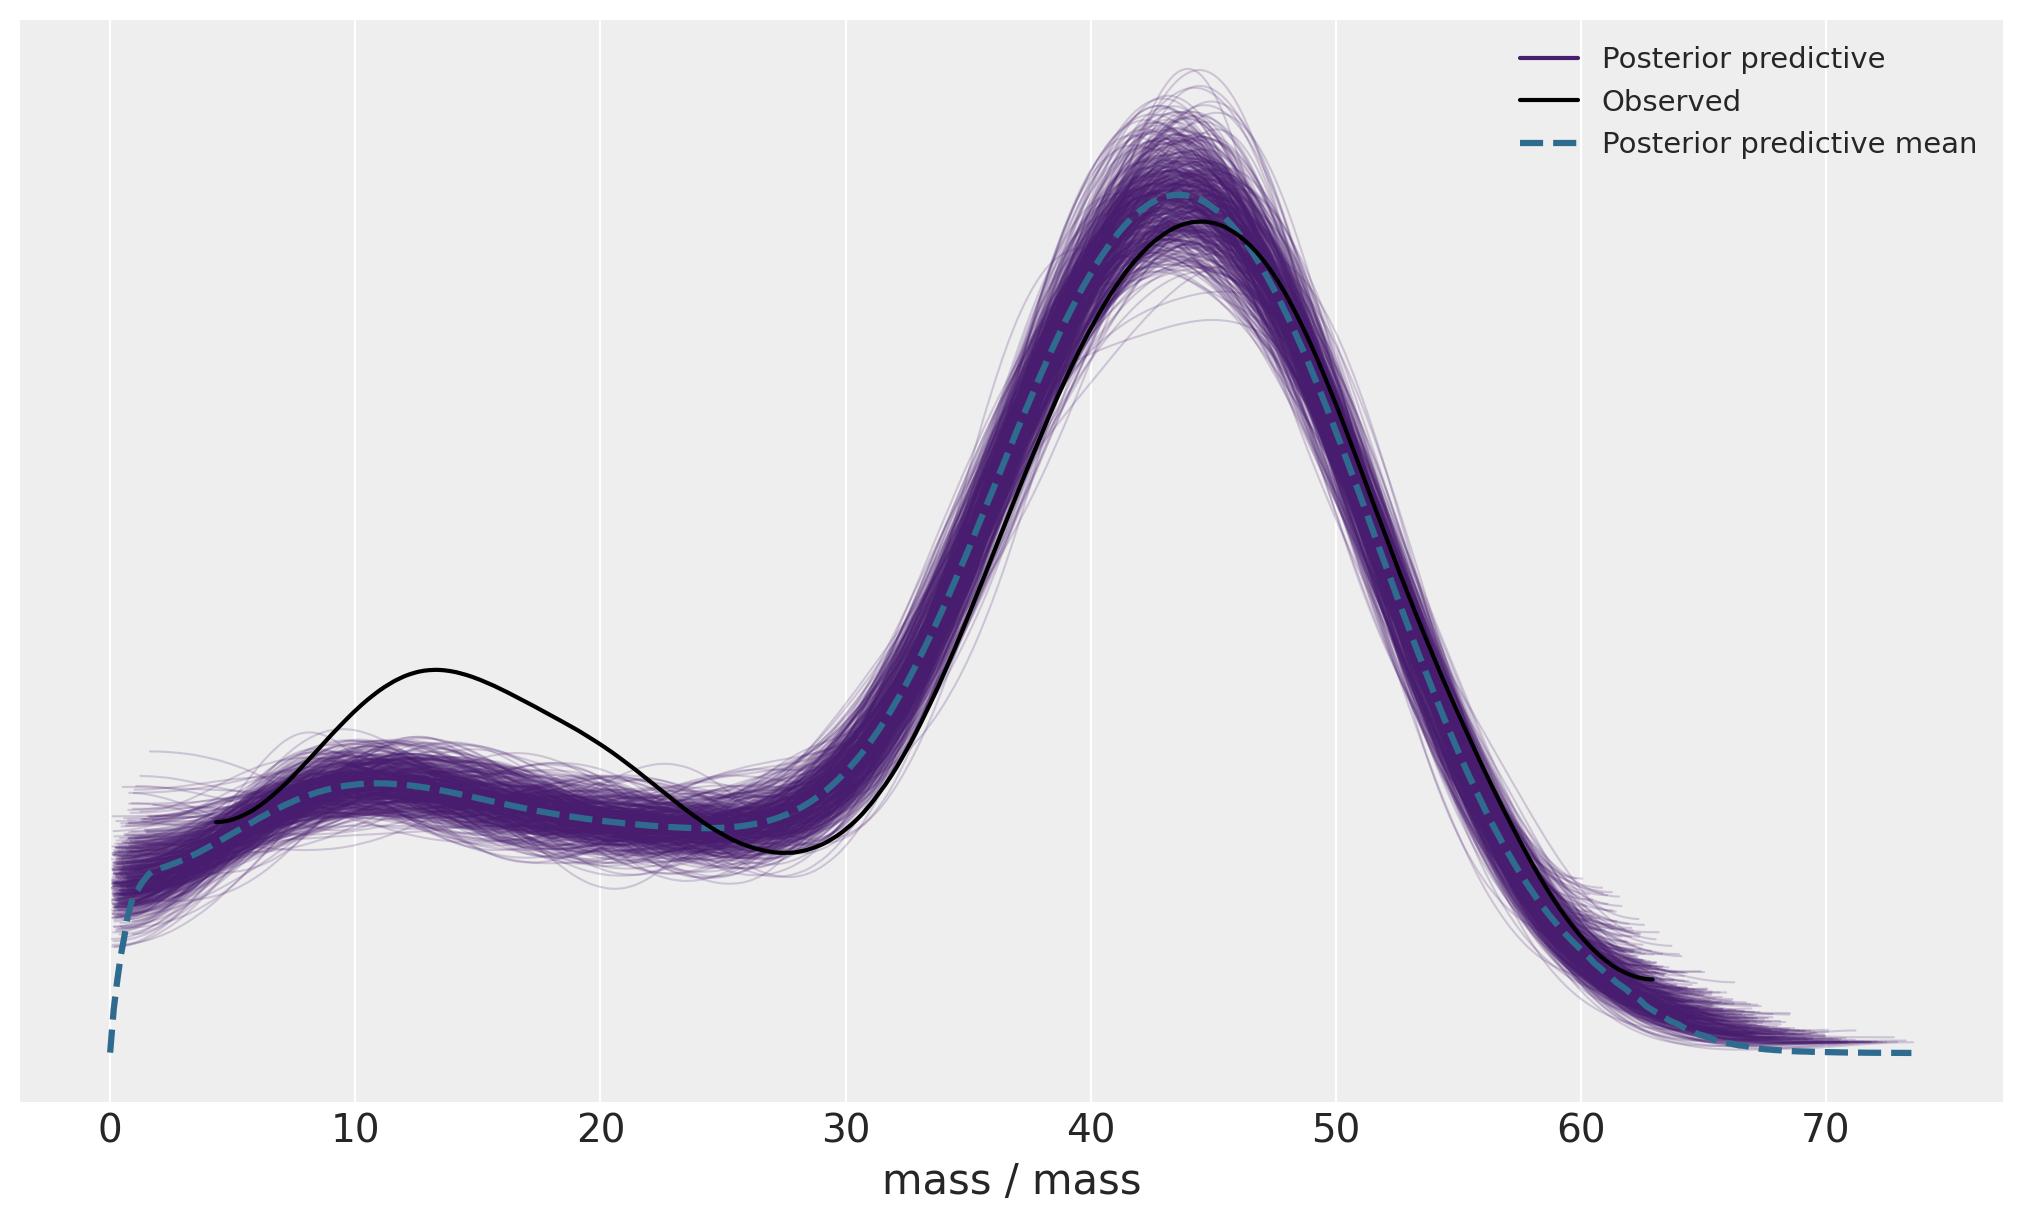

In [28]:
az.plot_ppc(data=idata_height_exp_male, group="posterior", kind="kde", num_pp_samples=500);

array([[<Axes: xlabel='height', ylabel='mass'>]], dtype=object)

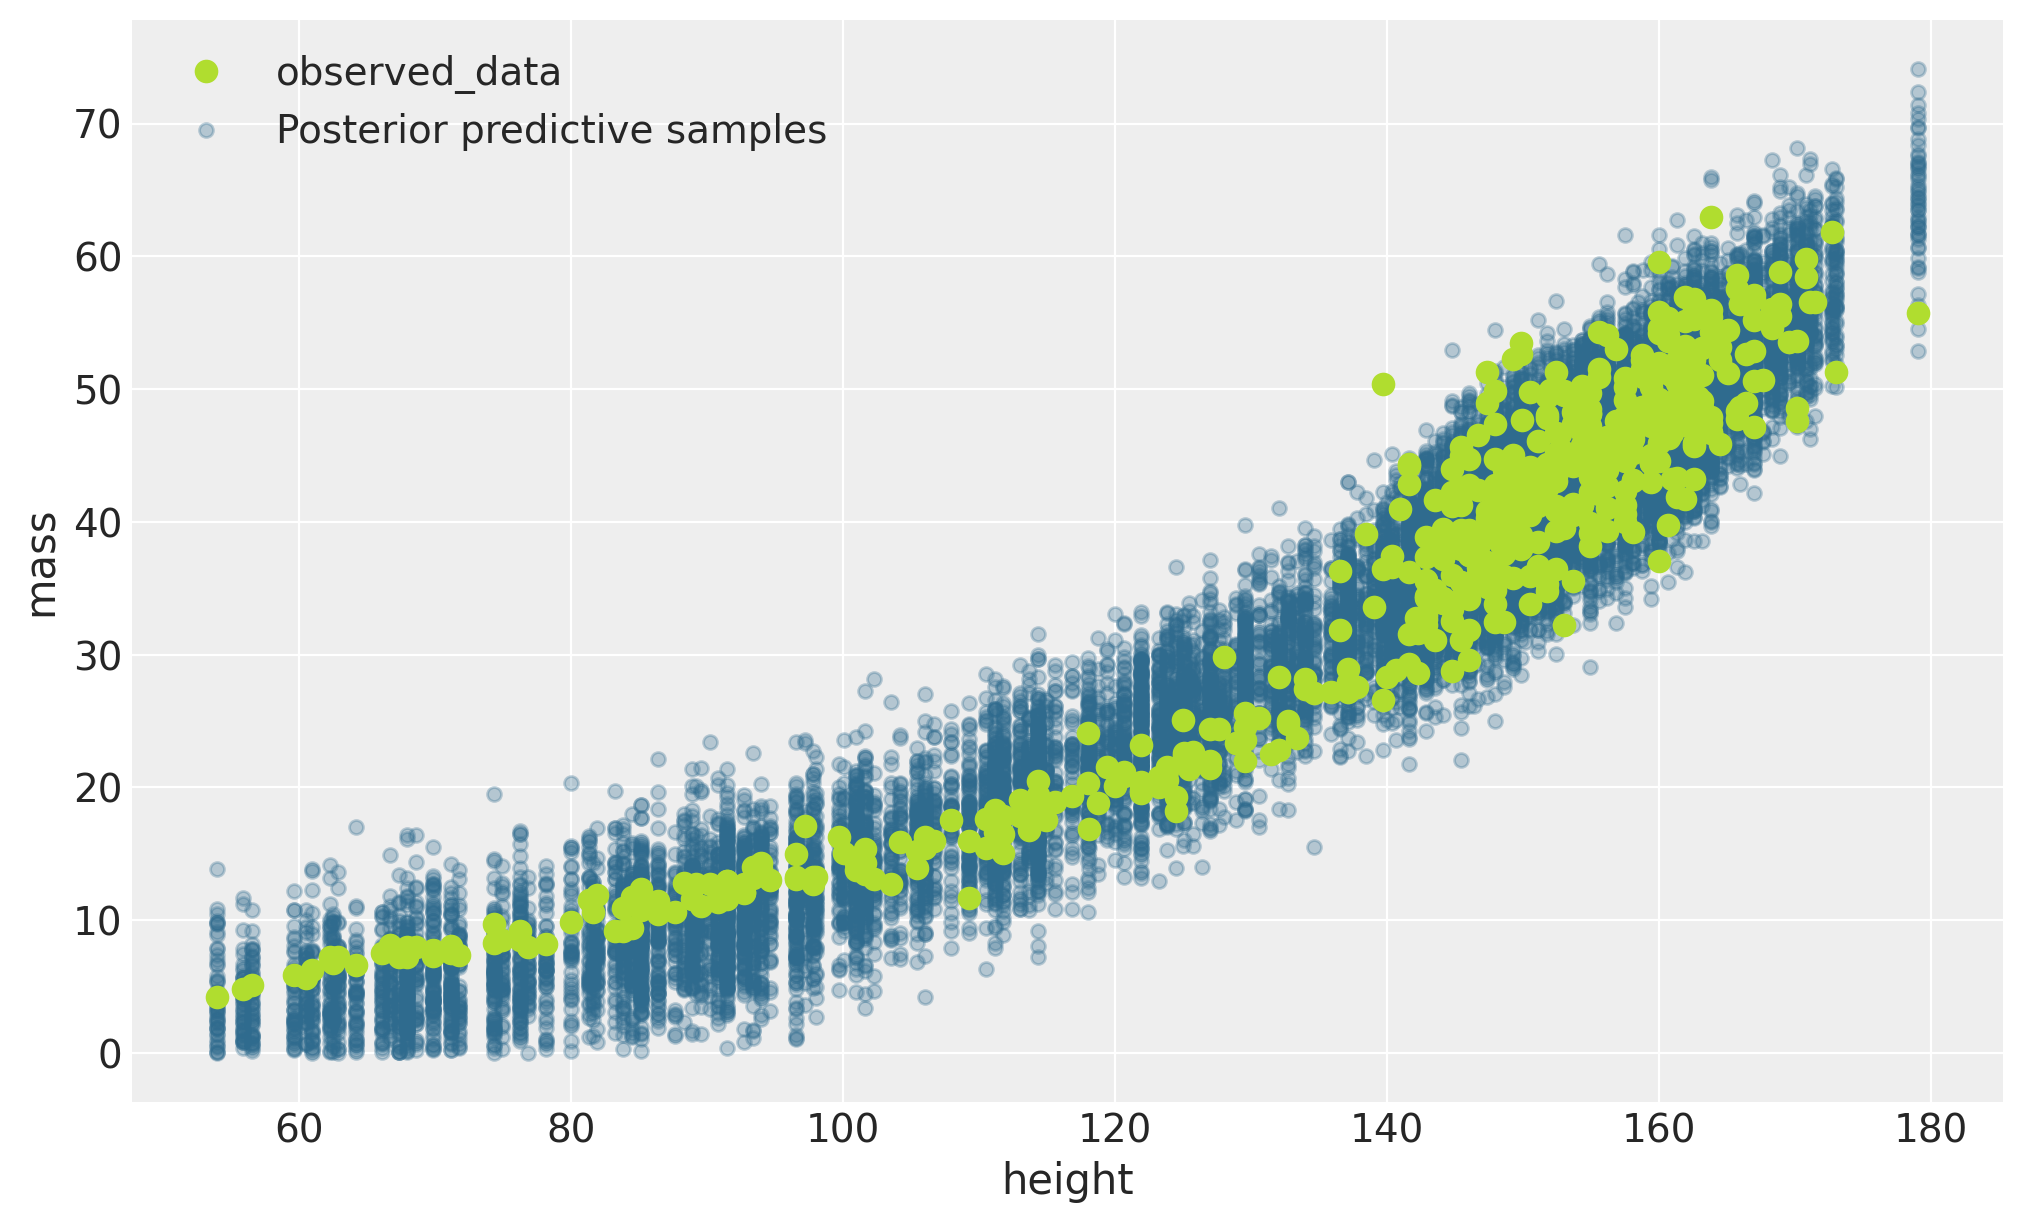

In [29]:
az.plot_lm(idata=idata_height_exp_male, y='mass', x='height')

In [33]:
%watermark

Last updated: 2023-10-09T23:52:57.249863+02:00

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

Compiler    : Clang 14.0.3 (clang-1403.0.22.14.1)
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit

